In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [2]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [3]:
dfAtopi = pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/csvs/patientNumber_imName_DegradationRate.csv")

In [4]:
dfNonAtopi= pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/csvs/nonAtopiImagesList.csv")

In [5]:
dfAtopi, dfNonAtopi

(      Unnamed: 0  patientNumber  \
 0              0         357290   
 1              1         976845   
 2              2        1012164   
 3              3         768041   
 4              4         909121   
 ...          ...            ...   
 1346        1346         529589   
 1347        1347         935352   
 1348        1348         476072   
 1349        1349         212879   
 1350        1350        1011786   
 
                                               imagePath  degradationRate  
 0     /home/ahmed/work/atopiWork/atopiImagesSkinOnly...                5  
 1     /home/ahmed/work/atopiWork/atopiImagesSkinOnly...                3  
 2     /home/ahmed/work/atopiWork/atopiImagesSkinOnly...                3  
 3     /home/ahmed/work/atopiWork/atopiImagesSkinOnly...                3  
 4     /home/ahmed/work/atopiWork/atopiImagesSkinOnly...                1  
 ...                                                 ...              ...  
 1346  /home/ahmed/work/atopiWork/

In [6]:
print(len(dfAtopi))

1351


In [7]:
dfAtopi["label"]=1

In [8]:
dfAtopi

,Unnamed: 0,patientNumber,imagePath,degradationRate,label
0,0,357290,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,5,1
1,1,976845,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
2,2,1012164,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
3,3,768041,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3,1
4,4,909121,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1,1
...,...,...,...,...,...
1346,1346,529589,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,4,1
1347,1347,935352,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2,1
1348,1348,476072,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1,1
1349,1349,212879,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2,1


In [9]:
dfAtopi = dfAtopi[["imagePath","label"]]
dfAtopi

,imagePath,label
0,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
2,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
3,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
4,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
...,...,...
1346,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1347,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1348,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1349,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1


In [10]:
newDf = pd.concat([dfNonAtopi, dfAtopi], axis=0)

In [11]:
newDf

,Unnamed: 0,imagePath,label
0,0.0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
1,1.0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
2,2.0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
3,3.0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
4,4.0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
...,...,...,...
1346,NaN,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1347,NaN,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1348,NaN,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1349,NaN,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1


In [13]:
imFilePaths = newDf["imagePath"].to_numpy()
imFileLabels = newDf["label"].to_numpy()

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((imFilePaths, imFileLabels))

In [23]:
imFileLabels.shape

(1367,)

In [15]:
imSizeX, imSizeY = IMG_SIZE
def parse_image(filename, label):
  #parts = tf.strings.split(filename, os.sep)
  #label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [imSizeX, imSizeY])
  return image, label

In [16]:
dataset = dataset.map(parse_image, num_parallel_calls=4)

In [17]:
image, label = next(iter(dataset))

In [20]:
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.6706, 0.4549, 0.302 ],
        [0.6745, 0.4471, 0.298 ],
        [0.6588, 0.4314, 0.2824]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.6627, 0.4471, 0.2941],
        [0.6667, 0.4392, 0.2902],
        [0.6471, 0.4196, 0.2706]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.6706, 0.4431, 0.298 ],
        [0.6667, 0.4392, 0.2902],
        [0.651 , 0.4235, 0.2745]],

       ...,

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.   

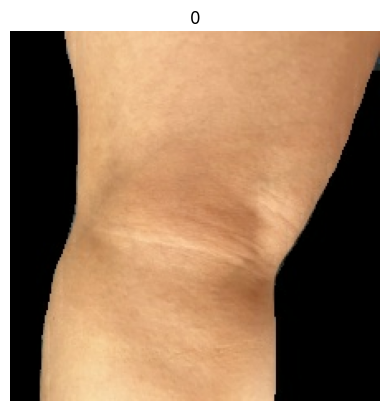

In [21]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()  

show(image, label)

In [22]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    print("train size", train_size)
    val_size = int(val_split * ds_size)
    print("val size", val_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(ds=dataset, ds_size=1367)

train size 1093
val size 136


In [27]:
def convertToBatch(datasets, batchSize=32):
    #for dataset in datasets:
    return dataset.batch(batchSize)

In [28]:
train_ds=convertToBatch(train_ds)
val_ds=convertToBatch(val_ds)
test_ds=convertToBatch(test_ds)

In [38]:
len(val_ds), len(test_ds)

(43, 43)

In [54]:
i=0
for batchNum in range(len(val_ds)):
    for images, labels in val_ds.take(1):
      print('images.shape: ', images.shape)
      print('labels.shape: ', labels.shape)
      print(labels[labels==0])
      print(labels[labels==1])
      print(i)
      i = i + 1

images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int64)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int64)
0
images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int64)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int64)
1
images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int64)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int64)
2
images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int64)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int64)
3
images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int64)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int64)
4
images.sha

In [48]:
plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


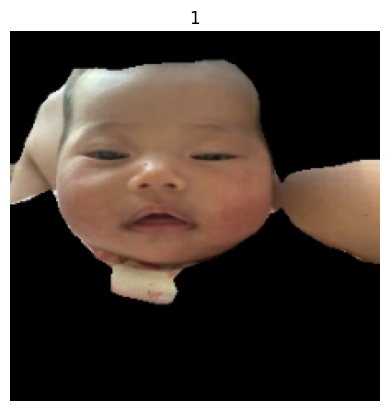

31
32
33
34
35
36
37
38
39
40
41
42


In [49]:
i=0
for images, labels in val_ds.take(44):
  #print('images.shape: ', images.shape)
  #print('labels.shape: ', labels.shape)
  print(i)
  i = i + 1
  if i == 31:
    show(images[0],labels[0])

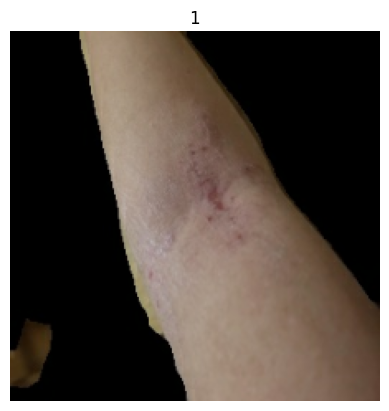

In [53]:
i=0
for images, labels in val_ds.take(44):
  #print('images.shape: ', images.shape)
  #print('labels.shape: ', labels.shape)
  #print(i)
  if i == 31:
    show(images[0],labels[0])
  i = i + 1

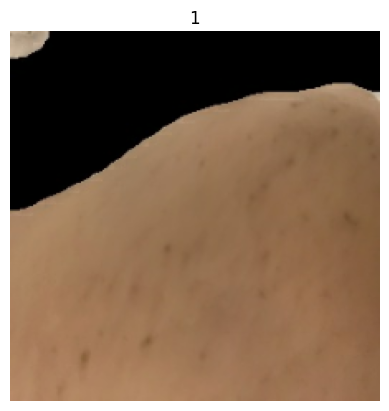

In [51]:
i=0
for images, labels in val_ds.take(44):
  #print('images.shape: ', images.shape)
  #print('labels.shape: ', labels.shape)
  #print(i)
  if i == 31:
    show(images[16],labels[16])
  i = i + 1

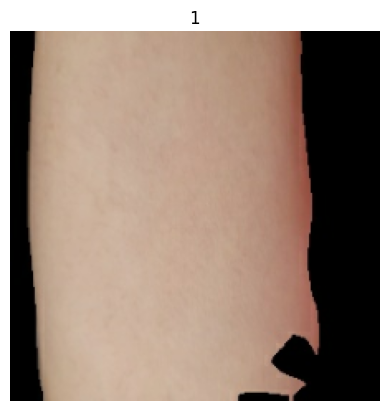

In [52]:
i=0
for images, labels in val_ds.take(44):
  #print('images.shape: ', images.shape)
  #print('labels.shape: ', labels.shape)
  #print(i)
  if i == 31:
    show(images[31],labels[31])
  i = i + 1

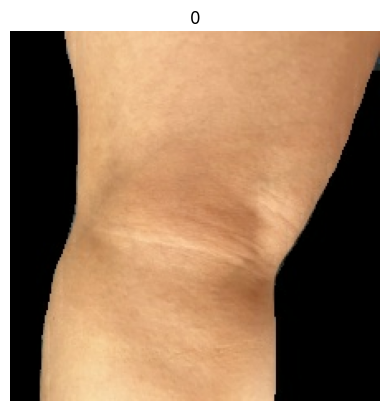

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


InvalidArgumentError: slice index 32 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [57]:
i=0
for images, labels in val_ds.take(43):
  #print('images.shape: ', images.shape)
  #print('labels.shape: ', labels.shape)
  #print(i)
  #if i == 31:
  if labels[i]==0: 
    show(images[i],labels[i])#break
  print(i)  
  i = i + 1